In [5]:
import pandas as pd

In [6]:
diabetes=pd.read_csv('diabetes.csv')

In [7]:
diabetes.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [8]:


features=['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness',
          'SerumInsulin','BMI','DiabetesPedigree','Age']
target='Diabetic'
X,y=diabetes[features],diabetes[target]
print('X:')
display(X)
print('\ny:')
display(y)

X:


,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
0,0,171,80,34,23,43.509726,1.213191,21
1,8,92,93,47,36,21.240576,0.158365,23
2,7,115,47,52,35,41.511523,0.079019,23
3,9,103,78,25,304,29.582192,1.282870,43
4,1,85,59,27,35,42.604536,0.549542,22
...,...,...,...,...,...,...,...,...
14995,10,65,60,46,177,33.512468,0.148327,41
14996,2,73,66,27,168,30.132636,0.862252,38
14997,0,93,89,43,57,18.690683,0.427049,24
14998,0,132,98,18,161,19.791645,0.302257,23



y:


0        0
1        0
2        0
3        1
4        0
        ..
14995    1
14996    1
14997    0
14998    0
14999    1
Name: Diabetic, Length: 15000, dtype: int64

In [9]:
type(target)

str

In [10]:
type(y)

pandas.core.series.Series

In [11]:
pd.Series(y).value_counts(normalize=True)

Diabetic
0    0.666667
1    0.333333
Name: proportion, dtype: float64

In [12]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  int64  
 9   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


In [13]:
X.describe()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,3.224533,107.856867,71.220667,28.814000,137.852133,31.509646,0.398968,30.137733
std,3.391020,31.981975,16.758716,14.555716,133.068252,9.759000,0.377944,12.089703
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000
25%,0.000000,84.000000,58.000000,15.000000,39.000000,21.259887,0.137743,22.000000
50%,2.000000,104.000000,72.000000,31.000000,83.000000,31.767940,0.200297,24.000000
75%,6.000000,129.000000,85.000000,41.000000,195.000000,39.259692,0.616285,35.000000
max,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,77.000000


### wylaczenie scrollowania 

In [14]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [15]:
import matplotlib.pyplot as plt

Unique values: 15


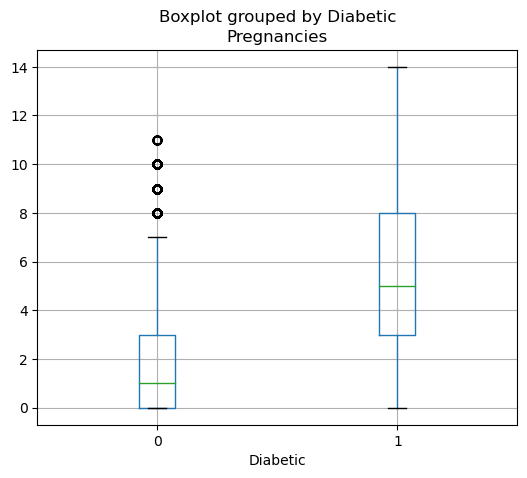

Unique values: 149


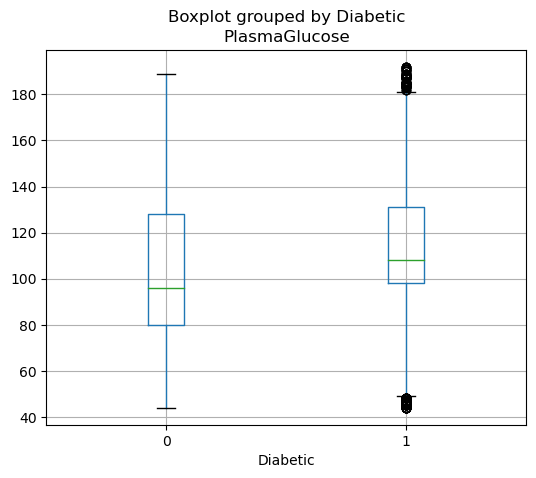

Unique values: 90


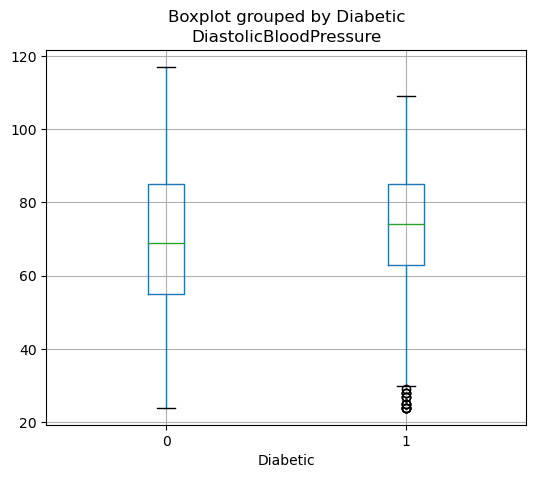

Unique values: 69


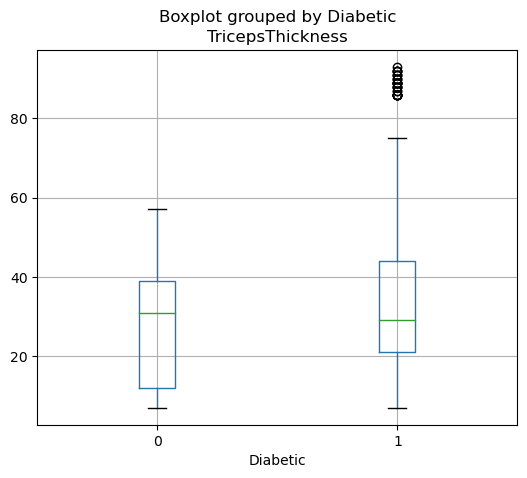

Unique values: 663


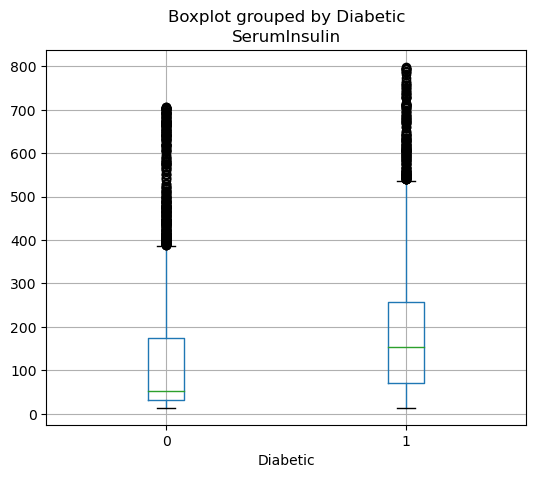

Unique values: 15000


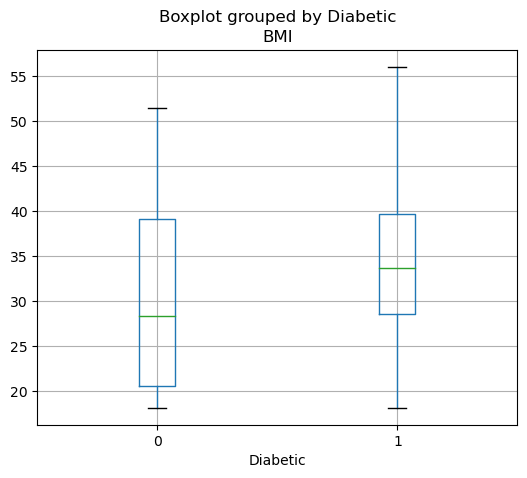

Unique values: 14999


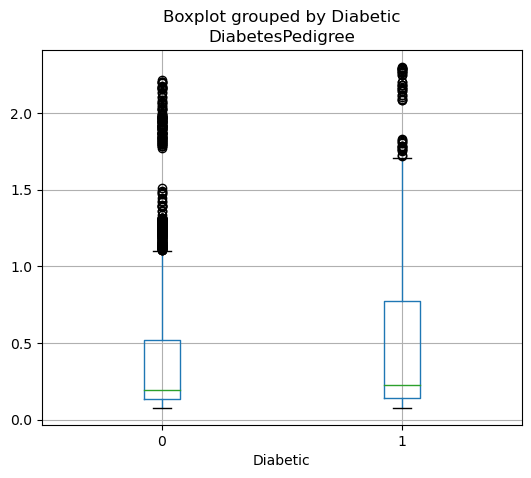

Unique values: 56


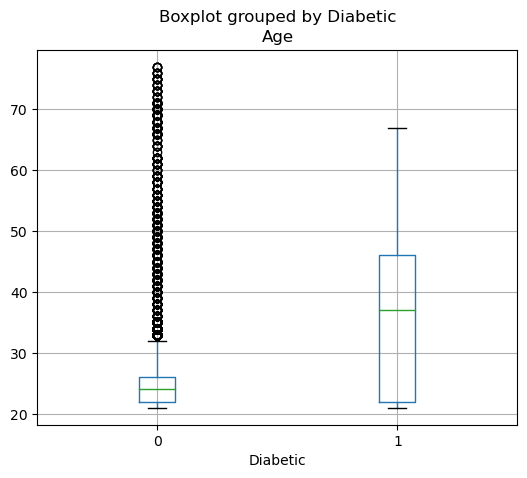

In [16]:
for col in features:
    print(f'Unique values: {len(diabetes[col].unique())}')
    diabetes.boxplot(column=col,by="Diabetic",figsize=(6,5))
    plt.title(col)
    plt.show()

In [17]:
import warnings
warnings.filterwarnings('ignore')

### inna wizualizacja

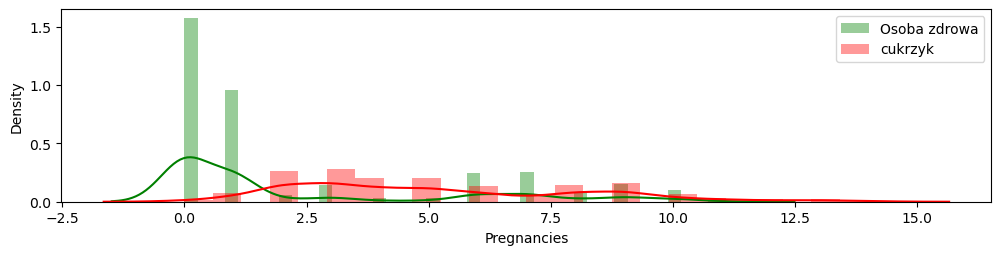

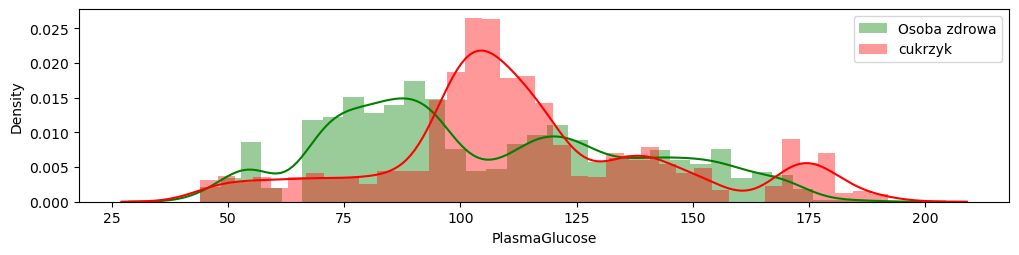

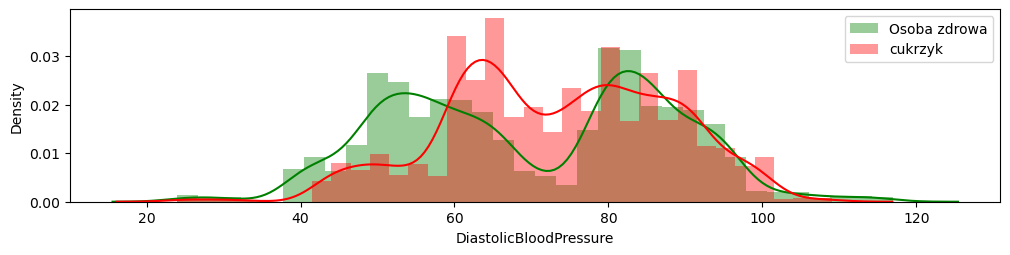

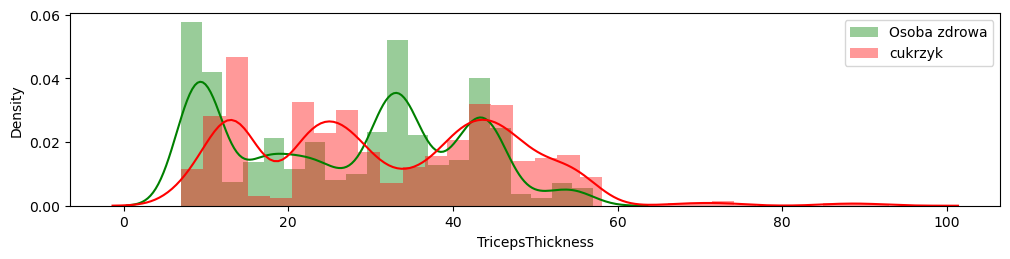

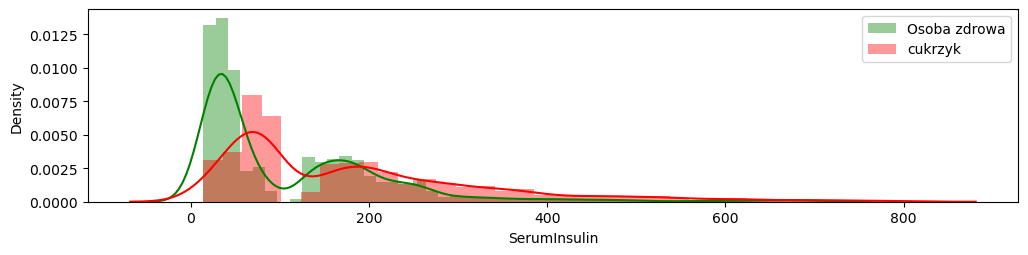

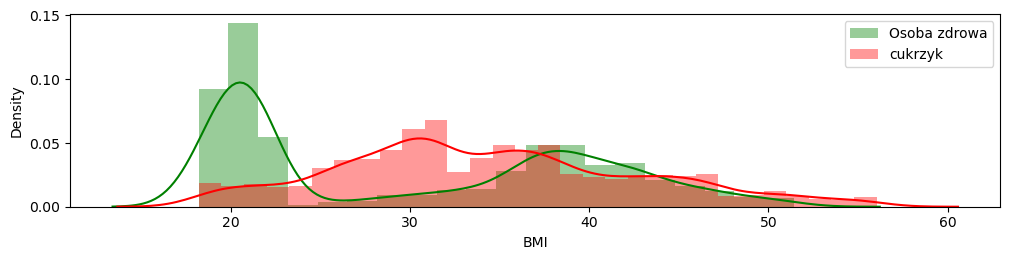

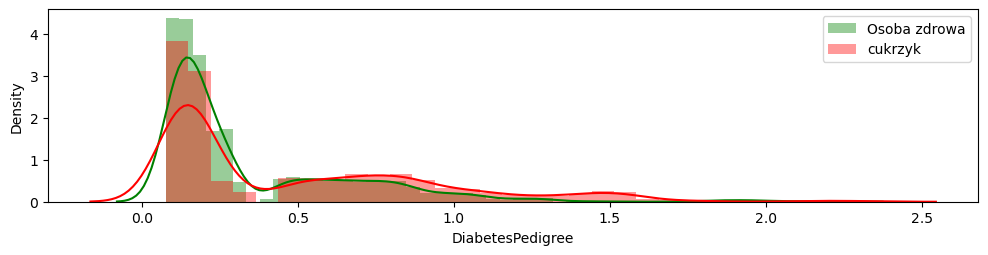

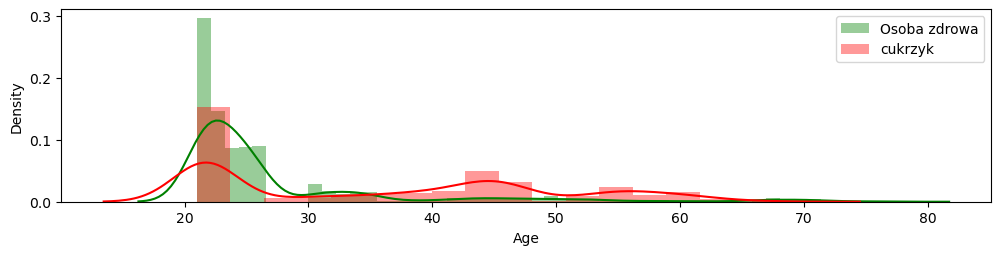

In [18]:
import seaborn as sns
for col in features:
    plt.figure(figsize=(12,2.5))
    sns.distplot(diabetes.loc[diabetes['Diabetic']==0,col],kde=True,color='green',label='Osoba zdrowa')
    sns.distplot(diabetes.loc[diabetes['Diabetic']==1,col],kde=True,color='red',label='cukrzyk')
    plt.legend(loc='upper right')
    plt.show

### Zauważyliśmy, że dwie cechy przekazują tę samą informację. Sprawdźmy to również dla tego problemu.

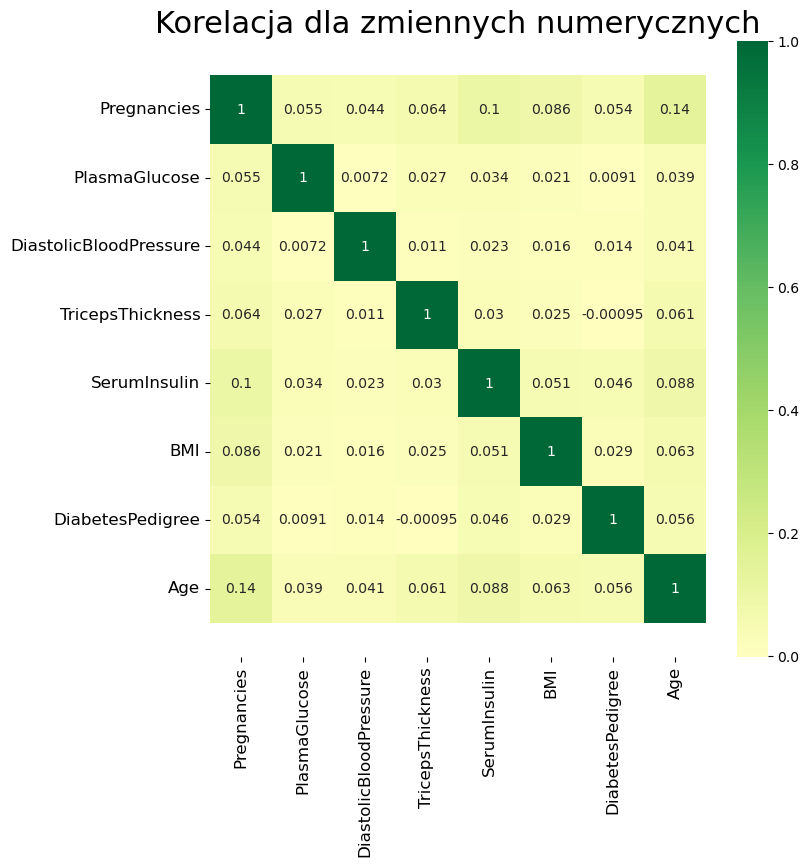

In [19]:
plt.figure(figsize=(8, 8))
ax = sns.heatmap(X.corr(),
                 xticklabels=X.corr().columns,
                 yticklabels=X.corr().columns,
                 cmap='RdYlGn',
                 center=0,
                 annot=True)

plt.title('Korelacja dla zmiennych numerycznych', fontsize=22)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## czemu nie liczymy korelacji Pearsona pomiędzy zmiennymi objaśniającymi a zmienną objaśnianą. Nie możemy tego zrobić, ponieważ y to zmienna kategoryczna. Aby policzyć korelację pomiędzy zmienną numeryczną a kategoryczną zastosować możemy współczynnik korelacji punktowo-dwuseryjnej (Point-biserial correlation coefficient). Skorzystajmy z biblioteki scipy.

In [20]:
from scipy import stats

corr_dict = {}
for col in features:
    corr_dict[col] = stats.pointbiserialr(X[col], y)[0]
pd.Series(corr_dict).sort_values(ascending=False)

Pregnancies               0.407315
Age                       0.342605
SerumInsulin              0.247375
BMI                       0.210508
DiabetesPedigree          0.170302
TricepsThickness          0.152505
PlasmaGlucose             0.128004
DiastolicBloodPressure    0.091307
dtype: float64

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[['Pregnancies', 'Age']], y, test_size=0.30, random_state=0, stratify=y)
print ('Treningowe obserwacje: %d\nTestowe obserwacje: %d' % (X_train.shape[0], X_test.shape[0]))

Treningowe obserwacje: 10500
Testowe obserwacje: 4500


In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [89]:
scaler_2var=StandardScaler()
X_train_standardized=scaler_2var.fit_transform(X_train)
X_test_standardized=scaler_2var.transform(X_test)


In [ ]:
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack

def plot_classification_surface(X_plot, y_plot, trained_model):
    plt.figure(figsize=(12, 7))

    # określenie granic zbioru
    min1, max1 = X_plot[:, 0].min()-1, X_plot[:, 0].max()+1
    min2, max2 = X_plot[:, 1].min()-1, X_plot[:, 1].max()+1

    # skalowanie dla obu osi
    x1grid = arange(min1, max1, 0.1)
    x2grid = arange(min2, max2, 0.1)

    # utworzenie siatki
    xx, yy = meshgrid(x1grid, x2grid)

    # przetworzenie siatki w wektor
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

    # stworzenie zmiennych objaśniających dla modelu
    grid = hstack((r1,r2))

    # predykcja modelu zbioru
    yhat = trained_model.predict(grid)

    # przetworzenie predykcji na decyzji dla konkretnego punktu wykresu
    zz = yhat.reshape(xx.shape)

    # wizualizacja siatki z przyporządkowaną klasą
    plt.contourf(xx, yy, zz, cmap='Paired')

    # tworzenie wykresu punktowego dla klas ze zbioru X
    for class_value in range(2):

        # przyporządkowanie klasy (y) do obsewacji (X)
        row_ix = where(y_plot == class_value)

        # stworzenie wykresu punktowego
        plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)

    # wizualizacja wykresu
    plt.legend(loc='upper right')
    plt.show()



Najlepsze parametry: {'C': 0.30000000000000004, 'penalty': 'l2', 'solver': 'lbfgs'}
F1_score training: 0.5468775476928094
F1_score: 0.5809280233832663





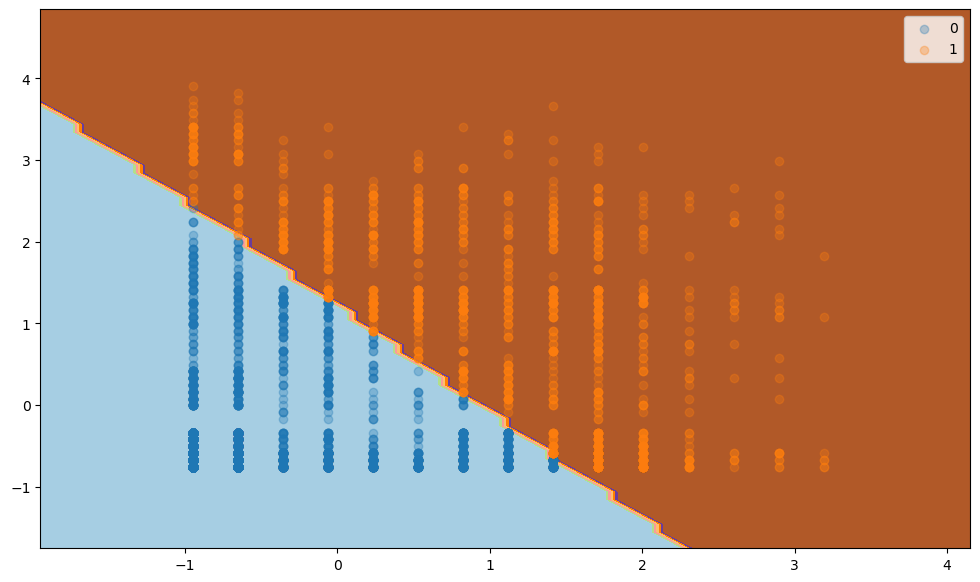

Najlepsze parametry: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
F1_score training: 0.5468775476928094
F1_score: 0.5809280233832663





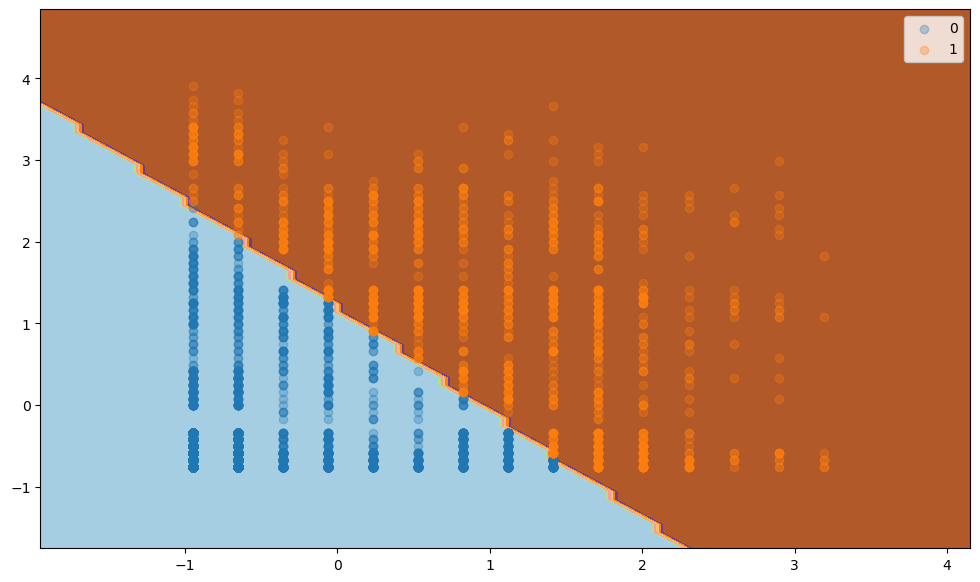

Najlepsze parametry: {'C': 0.30000000000000004, 'penalty': 'l2', 'solver': 'newton-cg'}
F1_score training: 0.5468775476928094
F1_score: 0.5809280233832663





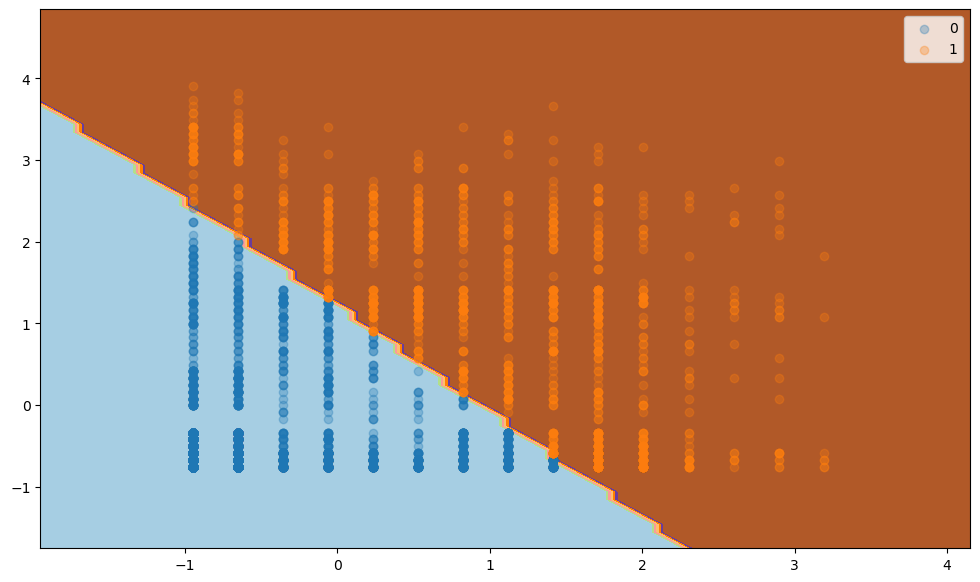

Najlepsze parametry: {'C': 0.30000000000000004, 'penalty': 'l2', 'solver': 'newton-cholesky'}
F1_score training: 0.5468775476928094
F1_score: 0.5809280233832663





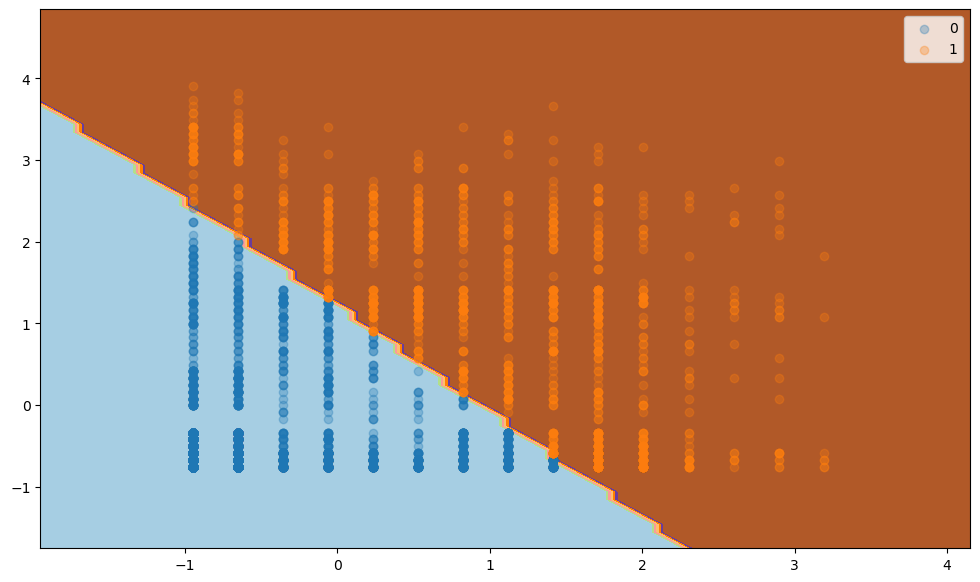

In [ ]:
for _ in ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:
    
    params={'C':np.arange(0.1,10,0.1),'penalty':['l1', 'l2', 'elasticnet', None],'solver':[_]}
    lr = LogisticRegression()
    lr_grid=GridSearchCV(lr,
                        params,
                        scoring='f1',
                        cv=5)

    lr_grid.fit(X_train_standardized,y_train)
    print("Najlepsze parametry:",lr_grid.best_params_)
    lr_best_est=lr_grid.best_estimator_
    predictions=lr_best_est.predict(X_test_standardized)
    train_predictions=lr_best_est.predict(X_train_standardized)
    print("F1_score training:", f1_score(y_train,train_predictions ))
    print("F1_score:", f1_score(y_test, predictions))
    print("\n\n")
    plot_classification_surface(X_plot=X_test_standardized, y_plot=predictions, trained_model=lr_best_est)

